In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("03-05-21:52.csv", delimiter=";")
bananas = data.groupby("product").get_group("BANANAS").reset_index().drop(columns=["product", "index"])
pearls = data.groupby("product").get_group("PEARLS").reset_index().drop(columns=["product", "index"])

In [4]:
bananas

,day,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,4946,1,4945.0,30.0,NaN,NaN,4952,30,NaN,NaN,NaN,NaN,4949.0,0.0
1,-1,100,4945,31,NaN,NaN,NaN,NaN,4950,7,4952.0,31.0,NaN,NaN,4947.5,0.0
2,-1,200,4945,22,NaN,NaN,NaN,NaN,4951,1,4952.0,21.0,NaN,NaN,4948.0,0.0
3,-1,300,4945,25,NaN,NaN,NaN,NaN,4952,25,NaN,NaN,NaN,NaN,4948.5,0.0
4,-1,400,4946,5,4945.0,25.0,NaN,NaN,4952,25,NaN,NaN,NaN,NaN,4949.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1,199500,4930,22,NaN,NaN,NaN,NaN,4937,22,NaN,NaN,NaN,NaN,4933.5,0.0
1996,-1,199600,4930,28,NaN,NaN,NaN,NaN,4937,28,NaN,NaN,NaN,NaN,4933.5,0.0
1997,-1,199700,4931,30,NaN,NaN,NaN,NaN,4937,2,4938.0,28.0,NaN,NaN,4934.0,0.0
1998,-1,199800,4931,1,4930.0,27.0,NaN,NaN,4937,28,NaN,NaN,NaN,NaN,4934.0,0.0


In [5]:
pearls

,day,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
1,-1,100,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,0.0
2,-1,200,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,0.0
3,-1,300,9996,2,9995.0,23.0,NaN,NaN,9998,3,10004.0,2.0,10005.0,23.0,9997.0,0.0
4,-1,400,9998,5,9996.0,2.0,9995.0,23.0,10004,2,10005.0,23.0,NaN,NaN,10001.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1,199500,9996,1,9995.0,21.0,NaN,NaN,9998,2,10004.0,1.0,10005.0,21.0,9997.0,1542.0
1996,-1,199600,9995,28,NaN,NaN,NaN,NaN,10005,28,NaN,NaN,NaN,NaN,10000.0,1546.0
1997,-1,199700,10002,1,9996.0,2.0,9995.0,28.0,10004,2,10005.0,28.0,NaN,NaN,10003.0,1546.0
1998,-1,199800,9996,1,9995.0,27.0,NaN,NaN,10004,1,10005.0,27.0,NaN,NaN,10000.0,1548.0


<Axes: >

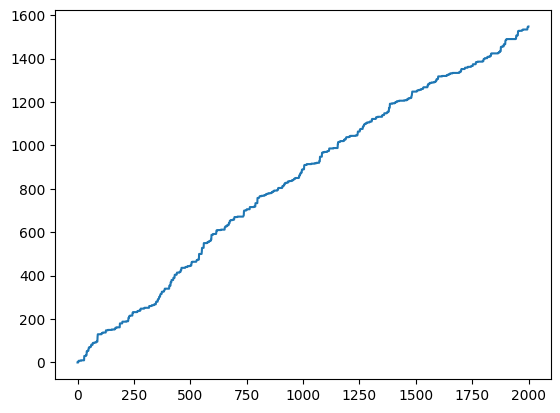

In [6]:
pearls["profit_and_loss"].plot()

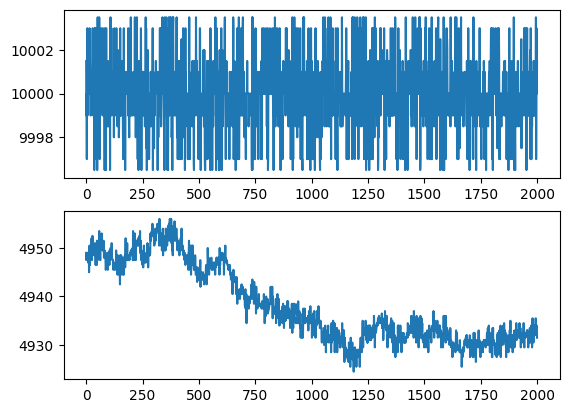

In [109]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.formatter.useoffset'] = False

fig, ax = plt.subplots(2, 1)
ax[0].plot(pearls["mid_price"])
ax[1].plot(bananas["mid_price"])

In [6]:
# Mean-reversion for pearls
pearls["mid_price"].ewm(span=20).mean()

fig, ax = plt.subplots()
ax.plot(pearls["mid_price"])
ax.plot(pearls["mid_price"].ewm(span=20).mean())

NameError: name 'plt' is not defined

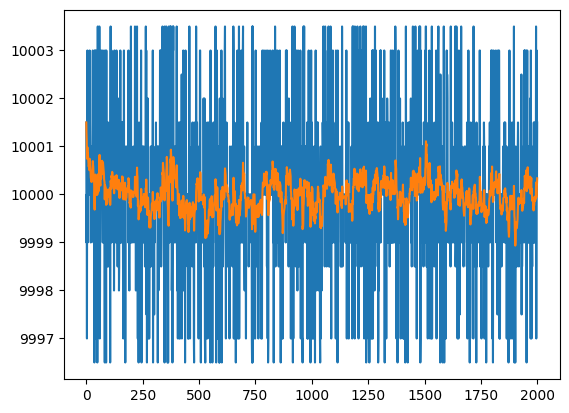

In [135]:
# Strategy: buy all below ewm, sell all above ewm
df = pd.DataFrame
pearls["ema"] = 0
pearls.loc[0, "ema"] = pearls.loc[0, "mid_price"]

N = 20
k = 2 / (N + 1)
for i in range(1, len(pearls)):
    pearls.loc[i, "ema"] = \
        pearls.loc[i, "mid_price"] * k + \
        pearls.loc[i - 1, "ema"] * (1 - k)
  
# Mean-reversion for pearls
fig, ax = plt.subplots()
ax.plot(pearls["mid_price"])
ax.plot(pearls["ema"])

<Axes: >

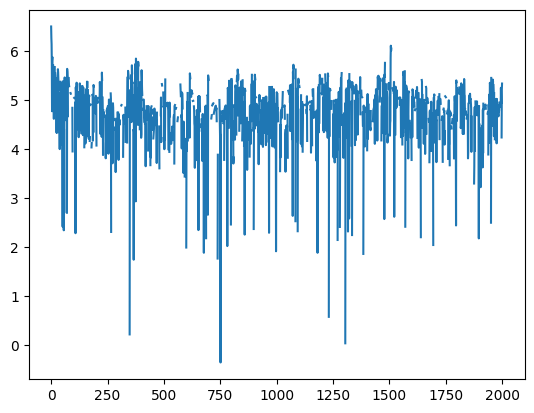

In [143]:
(pearls["ema"] - pearls["bid_price_2"]).plot()